<a href="https://colab.research.google.com/github/subhadrashaw/project/blob/main/HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

# import libraries

In [34]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

# Read xlsx file into data frame

In [3]:
dataset = pd.read_excel("DS - Assignment Part 1 data set.xlsx")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

   Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                 

In [7]:
dataset.shape

(414, 9)

In [ ]:
dataset.describe

<bound method NDFrame.describe of      Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience st

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 3
Float variables: 6


# **EDA**

In [8]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.9 MB/s 


In [9]:
import sweetviz as sv

In [10]:
report = sv.analyze(dataset)
report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


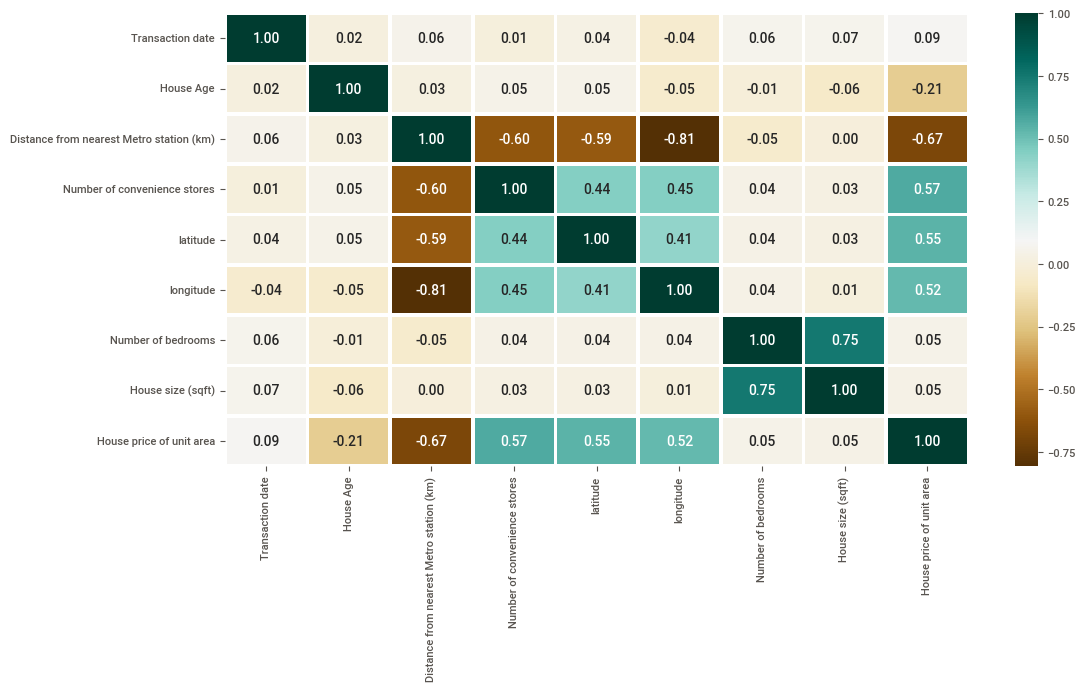

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# **Data Pre-Processing**

In [12]:
# Feature Engineering
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = 'geoapiExcercises')

In [13]:
loc = geolocator.reverse("24.84" +"," + "121.54").raw['address']
print(loc)

{'tourism': '信賢步道瀑布群', 'road': '信賢步道', 'neighbourhood': '信賢里', 'suburb': '烏來區', 'village': '哪哮 Lahaw', 'city': '新北市', 'ISO3166-2-lvl4': 'TW-NWT', 'postcode': '23341', 'country': '臺灣', 'country_code': 'tw'}


In [ ]:
loc_update = {"road":[]}

#def loc(cord):
for i,cord in enumerate(dataset.iloc[:,4:6].values):
  Lat = str(cord[0])
  Long = str(cord[1])

  loc = geolocator.reverse(Lat +"," + Long).raw['address'] #raw returns dictionary
  #print(loc)
  #if values are empty replace by empty string

  if loc.get('road') is None:
    loc['road'] = None

  loc_update['road'].append(loc['road'])
  print(loc_update['road'])

In [15]:
loc = pd.DataFrame(loc_update)
loc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   road    401 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [16]:
# add new feature to dataset
for i in loc_update.keys():
  dataset[i] = loc_update[i]

#dataset = dataset.sample(axis = 0) 
#dataset(10)

In [17]:
dataset.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,road
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,民權路
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,大豐路
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,景美溪左岸自行車道
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,景美溪左岸自行車道
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,北新路三段
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,3,828,32.1,安康路二段
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,3,1115,40.3,二十張路129巷1弄
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,3,1316,46.7,北新路三段
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,1,588,18.8,None
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,2,1075,22.1,安興路


In [18]:
# drop latitudes and longitudes
dataset = dataset.drop(['latitude' , 'longitude'], axis=1)

In [19]:
dataset.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,road
0,2012.916667,32.0,84.87882,10,1,575,37.9,民權路
1,2012.916667,19.5,306.59470,9,2,1240,42.2,大豐路
2,2013.583333,13.3,561.98450,5,3,1060,47.3,景美溪左岸自行車道
3,2013.500000,13.3,561.98450,5,2,875,54.8,景美溪左岸自行車道
4,2012.833333,5.0,390.56840,5,1,491,43.1,北新路三段
5,2012.666667,7.1,2175.03000,3,3,828,32.1,安康路二段
6,2012.666667,34.5,623.47310,7,3,1115,40.3,二十張路129巷1弄
7,2013.416667,20.3,287.60250,6,3,1316,46.7,北新路三段
8,2013.500000,31.7,5512.03800,1,1,588,18.8,None
9,2013.416667,17.9,1783.18000,3,2,1075,22.1,安興路


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   Number of bedrooms                        414 non-null    int64  
 5   House size (sqft)                         414 non-null    int64  
 6   House price of unit area                  414 non-null    float64
 7   road                                      401 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 26.0+ KB


#Filling the missing catagorical values using Logistic Regression

In [21]:
missing_idx = []

for i in range(dataset.shape[0]):
  if dataset['road'][i] is None:
    missing_idx.append(i)

#independent features
missing_rd_X_train = np.array([ [dataset['Distance from nearest Metro station (km)'][i], dataset['House price of unit area'][i] ] for i in range (dataset.shape[0]) if i not in missing_idx]) 
#dependent feature   
missing_rd_Y_train = np.array([dataset['road'][i] for i in range (dataset.shape[0]) if i not in missing_idx])

missing_rd_X_test = np.array([[dataset['Distance from nearest Metro station (km)'][i], dataset['House price of unit area'][i]] for i in range (dataset.shape[0]) if i in missing_idx]) 

In [22]:
#model initialization

m1 = SGDClassifier()

#model training
m1.fit(missing_rd_X_train, missing_rd_Y_train)

missing_rd_Y_pred = m1.predict(missing_rd_X_test)

In [23]:
missing_rd_Y_pred

array(['安祥路', '安祥路', '安祥路', '安祥路', '安祥路', '安祥路', '安祥路', '安祥路', '安祥路',
       '安祥路', '安祥路', '安祥路', '安祥路'], dtype='<U11')

In [24]:
# add the model back to the data frame
for n,i in enumerate(missing_idx):
  dataset['road'][i] = missing_rd_Y_pred[n]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   Number of bedrooms                        414 non-null    int64  
 5   House size (sqft)                         414 non-null    int64  
 6   House price of unit area                  414 non-null    float64
 7   road                                      414 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 26.0+ KB


In [26]:
le = LabelEncoder()
dataset['road'] = le.fit_transform(dataset['road'])

In [27]:
dataset.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,road
0,2012.916667,32.0,84.87882,10,1,575,37.9,112
1,2012.916667,19.5,306.59470,9,2,1240,42.2,63
2,2013.583333,13.3,561.98450,5,3,1060,47.3,108
3,2013.500000,13.3,561.98450,5,2,875,54.8,108
4,2012.833333,5.0,390.56840,5,1,491,43.1,51
5,2012.666667,7.1,2175.03000,3,3,828,32.1,70
6,2012.666667,34.5,623.47310,7,3,1115,40.3,32
7,2013.416667,20.3,287.60250,6,3,1316,46.7,51
8,2013.500000,31.7,5512.03800,1,1,588,18.8,81
9,2013.416667,17.9,1783.18000,3,2,1075,22.1,83


# Understanding which model to use

In [30]:
X = dataset.drop(['House price of unit area'], axis=1)
Y = dataset['House price of unit area']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [53]:
# SVM-Support Vector Machine
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(r2_score(Y_valid, Y_pred))

0.20668450202997196
0.3958099496086993


In [52]:
#Random Forest Regression
model_RFR = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=4)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

#model accuracy
print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(r2_score(Y_valid, Y_pred))

0.13461381381376805
0.7183232644905232


In [54]:
#Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(r2_score(Y_valid, Y_pred))

0.19584425335636133
0.5433247084613042
